# Model Training

#### Predicting Math Score 

In [21]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [31]:
## read csv file
df = pd.read_csv('E:\\Machine learning END to END project\\ml_end_to_end_project\\data\\Processed\\cleaned_data.csv')
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
## Dropping unnnecessary columns
df.drop(columns=['Unnamed: 0','average_score', 'total_score'], axis= 1, inplace=True)

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Splitting the dataset to independent variable and dependent variable

In [34]:
X = df.drop(columns='math_score')
y = df['math_score']

In [35]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [36]:
education_mapping = {
    'some high school': "high school or below",
    'high school': "high school or below",
    "some college": "some college",
    "associate's degree": "associate's degree",
    "bachelor's degree": "bachelor's degree",
    "master's degree": "master's degree"
}

In [37]:
df['parental_level_of_education'] = df['parental_level_of_education'].map(education_mapping)
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school or below'], dtype=object)

In [39]:
## Updating the cleaned_data.csv
df.to_csv('cleaned_data.csv')

In [38]:
X['parental_level_of_education'] = X['parental_level_of_education'].map(education_mapping)
X.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school or below'], dtype=object)

In [9]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [10]:
X.parental_level_of_education.value_counts()

parental_level_of_education
high school or below    375
some college            226
associate's degree      222
bachelor's degree       118
master's degree          59
Name: count, dtype: int64

In [11]:
# Performing ordinal and onehotencoding for the categorical variable
# Create Column Transformer with 3 types of transformers
cat_features = ['gender','race_ethnicity','lunch','test_preparation_course']
or_features = ['parental_level_of_education']
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

or_transformer = OrdinalEncoder(categories=[['high school or below','some college',"associate's degree", "bachelor's degree", "master's degree"]])
oh_transformer = OneHotEncoder()
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("OrdinalEncoder", or_transformer, or_features),
        ('StandardScaler', num_transformer, num_features)        
    ],remainder='passthrough'
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
## now splliting the dataset in train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# picking the best Model (no hyperparameter tuning)

In [14]:
## creating a function that will evaluate the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3137
- Mean Absolute Error: 4.2513
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4464
- Mean Absolute Error: 4.3215
- R2 Score: 0.8794


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3042
- Mean Absolute Error: 4.2393
- R2 Score: 0.8739
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4720
- Mean Absolute Error: 4.3339
- R2 Score: 0.8783


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.3066
- Mean Absolute Error: 0.0253
- R2 Score: 0.9996
-------------------------------

## Result

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.879428
2,Ridge,0.878293
6,CatBoosting Regressor,0.861450
7,AdaBoost Regressor,0.849977
4,Random Forest Regressor,0.849665
5,XGBRegressor,0.831781
1,Lasso,0.820027
3,Decision Tree,0.763535


## Hyperparameter Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features': [5,7,'auto',8],
    'min_samples_split': [2,8,15,20],
    'n_estimators': [100,200,500,1000]
}

Xg_params = {
    'booster': ['gbtree', 'gblinear'],
    'lambda': [0.001, 0.1, 1],
    'objective': ['reg:squarederror','reg:squaredlogerror','reg:pseudohubererro','reg:absoluteerror']
}

randomcv_models = [
    ('RF', RandomForestRegressor(), rf_params),
    ('XGB', XGBRegressor(), Xg_params)
]

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter = 100,
                                cv = 5,
                                verbose = 2,
                                n_jobs = -1
                                )
    
    random.fit(X_train, y_train)
    model_param = random.best_params_
    print(model_param)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 8}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'objective': 'reg:squarederror', 'lambda': 0.001, 'booster': 'gblinear'}


In [18]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators= 500, min_samples_split= 8, max_features= 7, max_depth=8),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', reg_lambda= 0.001, booster='gblinear'), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2128
- Mean Absolute Error: 3.3968
- R2 Score: 0.9205
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9273
- Mean Absolute Error: 4.5881
- R2 Score: 0.8572


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 5.3085
- Mean Absolute Error: 4.2383
- R2 Score: 0.8737
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4571
- Mean Absolute Error: 4.3257
- R2 Score: 0.8790




In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,XGBRegressor,0.878953
0,Random Forest Regressor,0.857197


Therfore we will pick Linear regression as the model is .009 more accurate than XGBRegressor after hyperparameter tune

## Linear Regression

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.94


Text(0, 0.5, 'Y Pred')

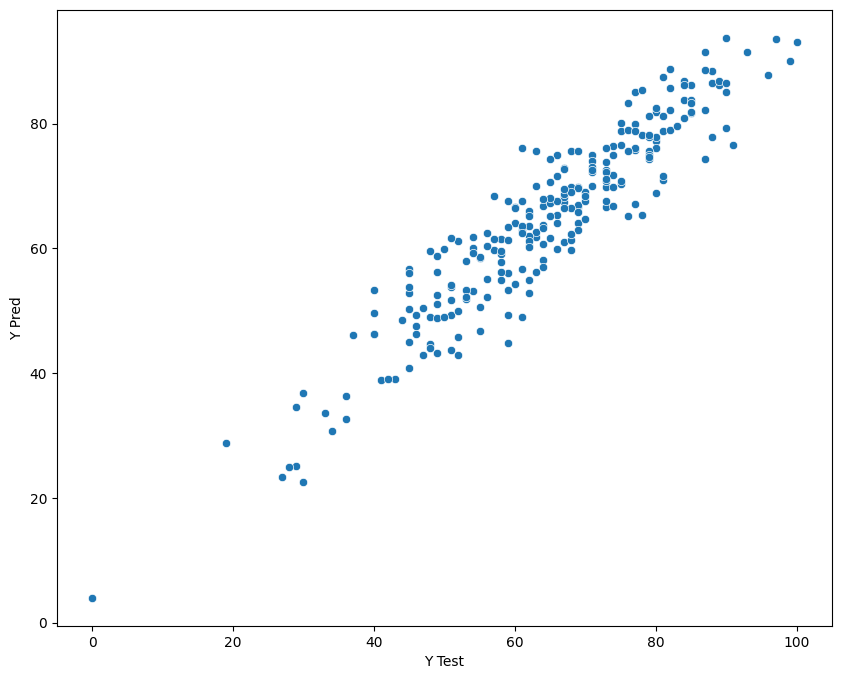

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

<Axes: xlabel='math_score'>

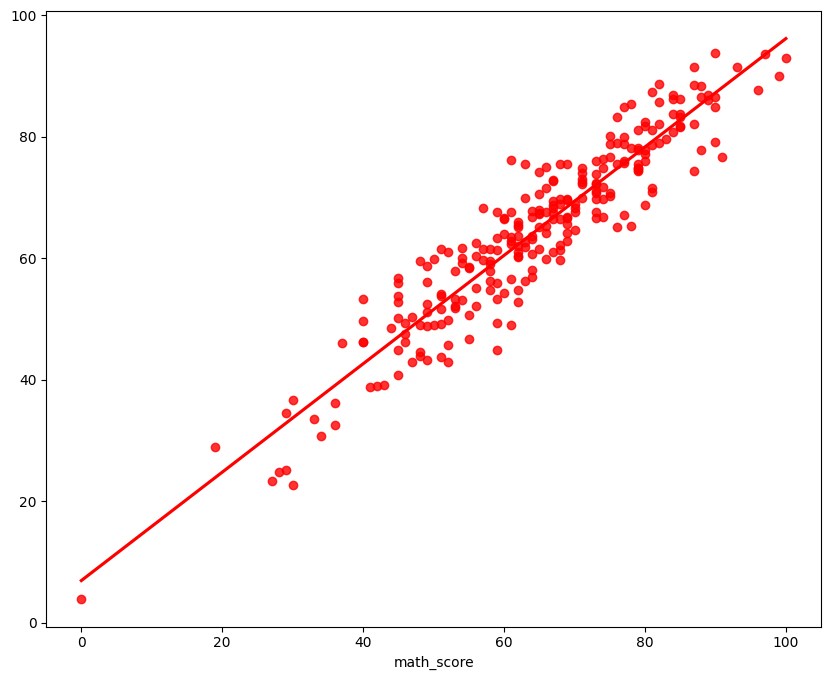

In [24]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

## Difference between Actual and Predicted Valaues

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.625,14.375
737,53,58.000,-5.000
740,80,77.250,2.750
660,74,76.375,-2.375
411,84,86.875,-2.875
...,...,...,...
109,70,64.625,5.375
430,64,63.250,0.750
77,80,82.500,-2.500
84,42,39.000,3.000
